# 02 - Additive interactions & Categorical interactions


*some explanations
In the context of linear regression, incorporating additive interactions modifies the model to capture how multiple predictors work together to influence the target variable. 


In regression, categorical interactions deal with how the relationship between predictors and the target variable changes depending on the categories of a variable. When at least one predictor is categorical (e.g., gender, education level), the model adjusts to capture how the category modifies the effects of other predictors.
From my point of view, I do not have any categorical variable in this dataset but I will try this method out in order to practice.

In [ ]:
# import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import mutual_info_regression
import shap
from lime.lime_tabular import LimeTabularExplainer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

In [9]:
# Load your dataset
df = pd.read_csv("Numeric data (last year work).csv")


In [10]:
# setting the the target and predictors
target = 'Rating' 
predictors = ['Year', 'Duration']

In [ ]:
# Additive Model (No Interaction)
X = df[predictors]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the additive model
model_additive = LinearRegression()
model_additive.fit(X_train, y_train)

# Predictions
predictions_additive = model_additive.predict(X_test)

# Metrics for Additive Model
print("\nMetrics for Additive Model:")
print("MAE:", round(mean_absolute_error(y_test, predictions_additive), 2))
print("MSE:", round(mean_squared_error(y_test, predictions_additive), 2))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, predictions_additive)), 2))
print("R-squared:", round(r2_score(y_test, predictions_additive), 2))

# original metrics:
# MAE 0.3
# MSE 0.15 ^2
# RMSE: 0.38
# R-squared: 0.44

# wow, combining 2 variables which affect the target variable
# brought some results
# but R-squared became significantly less


Metrics for Additive Model:
MAE: 0.4
MSE: 0.23
RMSE: 0.48
R-squared: 0.14


C:\Users\e1003118\AppData\Local\Temp\ipykernel_15244\1548188037.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - predictions_additive, kde=True)


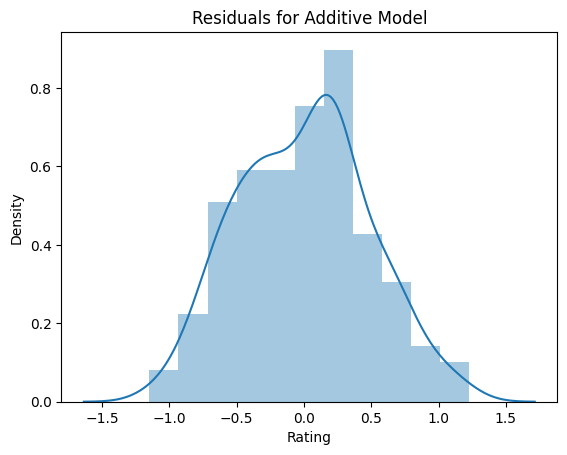

In [ ]:
# Residuals Plot for Additive Model
sns.distplot(y_test - predictions_additive, kde=True)
plt.title("Residuals for Additive Model")
plt.show()

# comparison:

# I included the screenshot of the plot which 
# was developed with the originanl linear regression

# we can see that distribution became a little bit worse
# it is less balanced now

# probably, if I experimented more with predictors
# the plot could be different

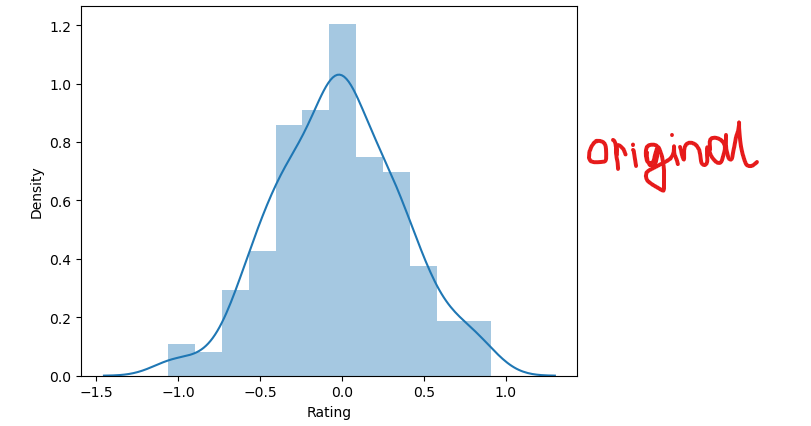

In [ ]:
# Interaction Model
# Create interaction term
df['Year_Duration_interaction'] = df['Year'] * df['Duration']
X_interaction = df[['Year', 'Duration', 'Year_Duration_interaction']]

# Train-test split for interaction model
X_train_interaction, X_test_interaction, y_train_interaction, y_test_interaction = train_test_split(
    X_interaction, y, test_size=0.2, random_state=42
)

# Fit the interaction model
model_interaction = LinearRegression()
model_interaction.fit(X_train_interaction, y_train_interaction)

# Predictions for Interaction Model
predictions_interaction = model_interaction.predict(X_test_interaction)

# Metrics for Interaction Model
print("\nMetrics for Interaction Model:")
print("MAE:", round(mean_absolute_error(y_test_interaction, predictions_interaction), 2))
print("MSE:", round(mean_squared_error(y_test_interaction, predictions_interaction), 2))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test_interaction, predictions_interaction)), 2))
print("R-squared:", round(r2_score(y_test_interaction, predictions_interaction), 2))

# original metrics:
# MAE 0.3
# MSE 0.15 ^2
# RMSE: 0.38
# R-squared: 0.44

# here is the same that everything rased up
# expect r-squared


Metrics for Interaction Model:
MAE: 0.4
MSE: 0.23
RMSE: 0.48
R-squared: 0.14


C:\Users\e1003118\AppData\Local\Temp\ipykernel_15244\1526857017.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test_interaction - predictions_interaction, kde=True)


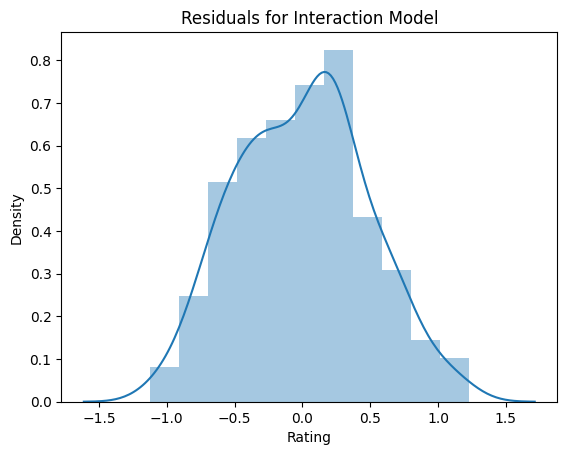

In [21]:
# Residuals Plot for Interaction Model
sns.distplot(y_test_interaction - predictions_interaction, kde=True)
plt.title("Residuals for Interaction Model")
plt.show()

In [ ]:
# oh, the distribution became worse
# probably, because of the lack of categorical variables
# which are essential for this tool